#Pobranie danych

https://docs.zonda.exchange/reference/wykres

KONWERSJA CZASU

https://www.online-toolz.com/tools/unix-timestamp-to-date.php


In [ ]:
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib
from statsmodels.tsa.arima_model import ARIMA

url = "https://api.zonda.exchange/rest/trading/stats"

headers = {'content-type': 'application/json'}

response = requests.request("GET", url, headers=headers)

for j in response.json()['items']:
  print('kod rynku: {}'.format(j))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


kod rynku: DAI-PLN
kod rynku: USDT-GBP
kod rynku: LML-PLN
kod rynku: BSV-EUR
kod rynku: LTC-ETH
kod rynku: LML-BTC
kod rynku: GRT-USDT
kod rynku: AVAX-EUR
kod rynku: ZRX-EUR
kod rynku: BSV-USDT
kod rynku: BTC-USDC
kod rynku: AVAX-PLN
kod rynku: BSV-BTC
kod rynku: ZRX-BTC
kod rynku: DOT-BTC
kod rynku: DOGE-USDT
kod rynku: REEF-USDT
kod rynku: ALGO-USDT
kod rynku: GRT-PLN
kod rynku: XTZ-USDT
kod rynku: AMLT-PLN
kod rynku: ETH-USDC
kod rynku: BOB-BTC
kod rynku: XRP-BTC
kod rynku: DASH-PLN
kod rynku: USDC-GBP
kod rynku: ETH-GBP
kod rynku: ALG-BTC
kod rynku: XRP-EUR
kod rynku: SUSHI-PLN
kod rynku: BTC-USD
kod rynku: WIS-USDT
kod rynku: BOB-PLN
kod rynku: USDC-USDT
kod rynku: COMP-PLN
kod rynku: DASH-USDT
kod rynku: BTC-EUR
kod rynku: REP-PLN
kod rynku: TRX-PLN
kod rynku: UNI-USDT
kod rynku: LSK-BTC
kod rynku: LUNA-USDT
kod rynku: BTG-BTC
kod rynku: DOT-PLN
kod rynku: LINK-PLN
kod rynku: ALGO-USDC
kod rynku: AVAX-USDC
kod rynku: ETH-BTC
kod rynku: OMG-BTC
kod rynku: REEF-PLN
kod rynku: DAI-B

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
['1647504000000', {'o': '464.84', 'c': '465.64', 'h': '467.21', 'l': '461.46', 'v': '25.97074325', 'co': '16'}]
-----------------------------
Kurs otwarcia: 464.1
Kurs zamkniecia: 465.37
Najwyższa wartość kursu: 467.01
Najniższa wartość kursu: 464
Wygenerowany wolumen: 22.85985822
['1647511200000', {'o': '464.1', 'c': '465.37', 'h': '467.01', 'l': '464', 'v': '22.85985822', 'co': '12'}]
-----------------------------
Kurs otwarcia: 470.3
Kurs zamkniecia: 471
Najwyższa wartość kursu: 471
Najniższa wartość kursu: 466.74
Wygenerowany wolumen: 46.45697768
['1647518400000', {'o': '470.3', 'c': '471', 'h': '471', 'l': '466.74', 'v': '46.45697768', 'co': '31'}]
-----------------------------
Kurs otwarcia: 471
Kurs zamkniecia: 467.15
Najwyższa wartość kursu: 472.52
Najniższa wartość kursu: 467.15
Wygenerowany wolumen: 28.98455135
['1647525600000', {'o': '471', 'c': '467.15', 'h': '472.52', 'l': '467.15', 'v': '28.98455135', 'co': 

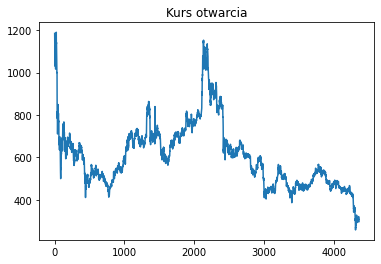

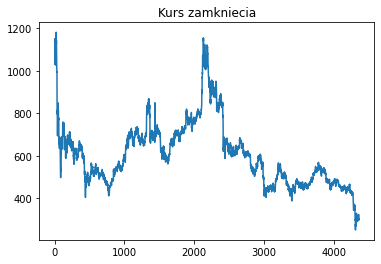

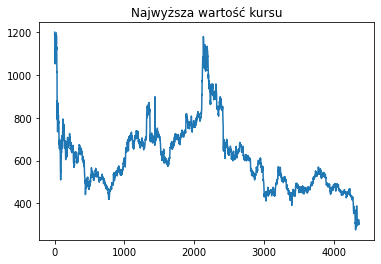

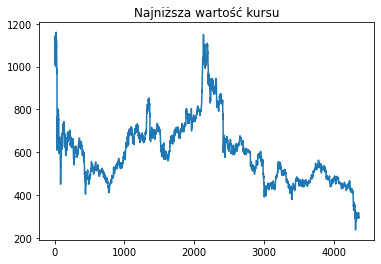

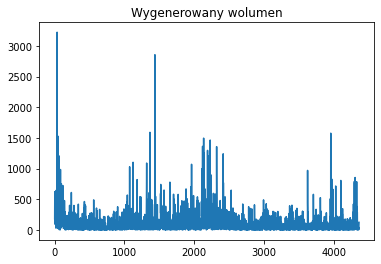

In [ ]:
url = "https://api.zonda.exchange/rest/trading/candle/history/LTC-PLN/7200?from=1621167098000&to=1652696833000"

response = requests.request("GET", url)

o = []
c = []
h = []
l = []
v = []

for j in response.json()['items']:
  print('-----------------------------')
  print('Kurs otwarcia: {}'.format(j[1]['o']))
  print('Kurs zamkniecia: {}'.format(j[1]['c']))
  print('Najwyższa wartość kursu: {}'.format(j[1]['h']))
  print('Najniższa wartość kursu: {}'.format(j[1]['l']))
  print('Wygenerowany wolumen: {}'.format(j[1]['v']))
  print(j)

  o.append(float(j[1]['o']))
  c.append(float(j[1]['c']))
  h.append(float(j[1]['h']))
  l.append(float(j[1]['l']))
  v.append(float(j[1]['v']))

print(len(response.json()['items']))
plt.plot(o)
plt.title('Kurs otwarcia')
plt.show()
plt.plot(c)
plt.title('Kurs zamkniecia')
plt.show()
plt.plot(h)
plt.title('Najwyższa wartość kursu')
plt.show()
plt.plot(l)
plt.title('Najniższa wartość kursu')
plt.show()
plt.plot(v)
plt.title('Wygenerowany wolumen')
plt.show()

#1. Dla notowań giełdowych kryptowaluty zaproponuj i zrealizuj selekcje danych, format danych oraz podział tych danych na dane treningowe i dane testowe,

In [ ]:
dict = {"open": o, "high": h,
        "low": l, "close": c}
df = pd.DataFrame(dict)
df.to_csv('shows.csv')
df = pd.read_csv('shows.csv')
df.head(5)

,Unnamed: 0,open,high,low,close
0,0,1185.01,1200.98,1141.39,1141.39
1,1,1141.59,1160.64,1115.84,1150.21
2,2,1140.40,1154.55,1064.44,1081.33
3,3,1085.09,1099.99,1050.02,1094.32
4,4,1091.01,1124.33,1090.01,1118.00


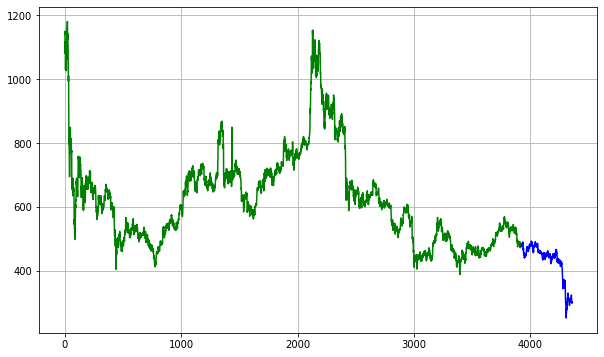

In [ ]:
n = int(len(df) * 0.9)
train_set = list(df.close[0:n])
test_set = list(df.close[n:])

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df.close[0:n], 'g', label='Train')
plt.plot(df.close[n:], 'b', label='Test')
plt.show()

#2. Zaproponuj liniowy model autoregresyjny (model AR) biorący pod uwagę kilka wcześniejszych notowań (nie więcej niż 50). Określ parametry modelu stosując metodę najmniejszych kwadratów. Zweryfikuj poprawność modelu,

In [ ]:
model_predictions = []
n_test_obser = len(test_set)

In [ ]:
for i in range(n_test_obser):
 model = ARIMA(train_set, order = (4,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = list(output[0])[0]
 model_predictions.append(yhat)
 actual_test_value = test_set[i]
 train_set.append(actual_test_value)

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4359
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -16594.303
Method:                       css-mle   S.D. of innovations             10.891
Date:                Mon, 23 May 2022   AIC                          33200.605
Time:                        10:27:39   BIC                          33238.885
Sample:                             1   HQIC                         33214.116
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1939      0.166     -1.170      0.242      -0.519       0.131
ar.L1.D.y     -0.0362      0.015     -2.394      0.017      -0.066      -0.007
ar.L2.D.y     -0.0112      0.015     -0.739      0.4

<function matplotlib.pyplot.show>

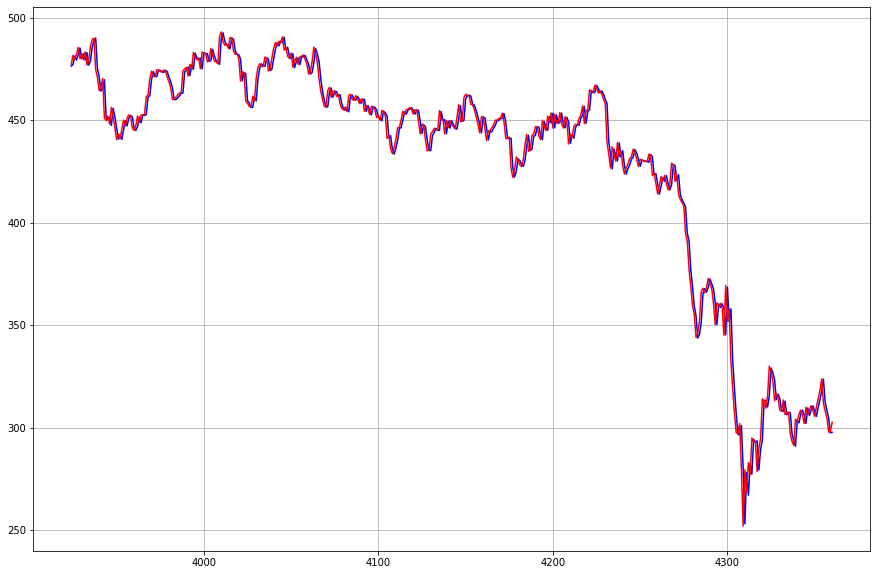

In [ ]:
plt.figure(figsize=(15,10))
plt.grid(True)

date_range = df[n:].index

plt.plot(date_range, model_predictions, color = 'blue')
plt.plot(date_range, test_set, color = 'red')
plt.show

#3. Zaproponuj sieć neuronową rekurencyjną do predykcji notowań. Wytrenuj sieć (zastosuj znane ci techniki trenowania sieci jak porzucanie, skalowanie etc.). Zweryfikuj poprawność modelu,

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

scaler = MinMaxScaler()
close_price = df.close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

In [ ]:
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)
def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

In [ ]:
SEQ_LEN = 100
X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.80)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,input_shape=(99,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 99, 32)            4352      
                                                                 
 lstm_32 (LSTM)              (None, 99, 32)            8320      
                                                                 
 lstm_33 (LSTM)              (None, 32)                8320      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
BATCH_SIZE = 64
history = model.fit(
 X_train, 
 y_train, 
 epochs=50, 
 batch_size=BATCH_SIZE, 
 shuffle=False,
 validation_split=0.1
)
model.evaluate(X_test, y_test)

Epoch 1/50
48/48 [==============================] - 7s 134ms/step - loss: 0.0177 - val_loss: 0.0175
Epoch 2/50
48/48 [==============================] - 6s 128ms/step - loss: 0.0161 - val_loss: 0.0176
Epoch 3/50
48/48 [==============================] - 6s 132ms/step - loss: 0.0125 - val_loss: 0.0099
Epoch 4/50
48/48 [==============================] - 6s 129ms/step - loss: 0.0093 - val_loss: 0.0069
Epoch 5/50
48/48 [==============================] - 6s 134ms/step - loss: 0.0075 - val_loss: 0.0044
Epoch 6/50
48/48 [==============================] - 6s 132ms/step - loss: 0.0065 - val_loss: 0.0038
Epoch 7/50
48/48 [==============================] - 7s 136ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 8/50
48/48 [==============================] - 6s 135ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 9/50
48/48 [==============================] - 6s 129ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 10/50
48/48 [==============================] - 6s 131ms/step - loss: 0.0051 - val_loss: 0.0024

0.0035139659885317087

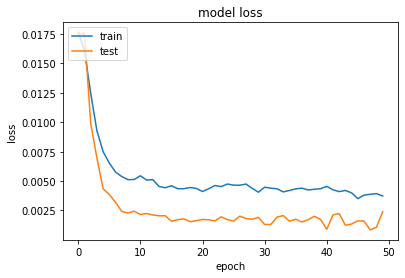

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

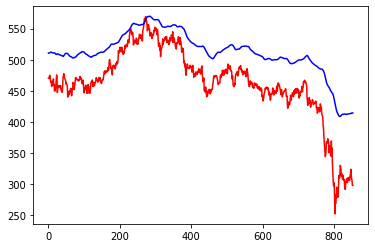

In [ ]:
y_hat = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, color='red')
plt.plot(y_hat_inverse, color='blue')

plt.show();

#4. Do predykcji notowań użyj dodatkowych dostępnych danych,

<function matplotlib.pyplot.show>

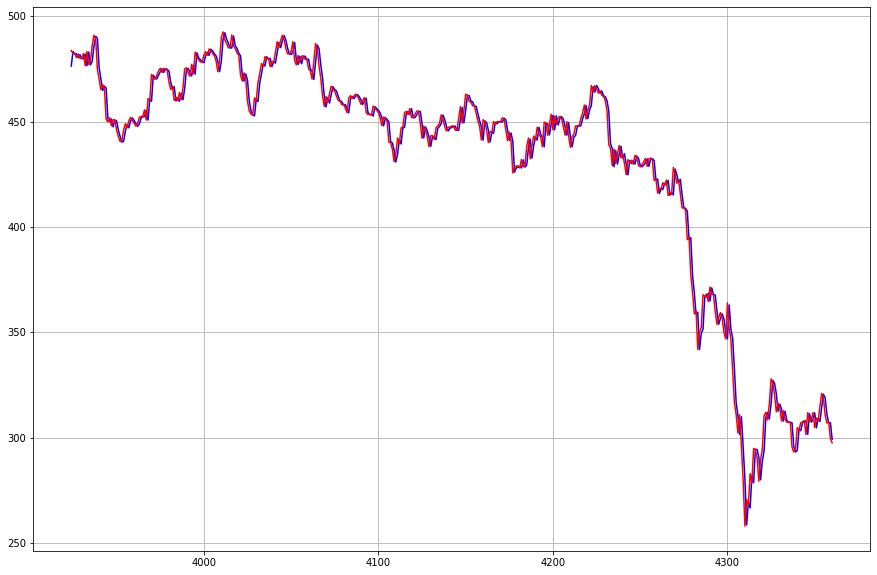

In [ ]:
n = int(len(df) * 0.9)
train_set = list(df.close[0:n])
test_set = list(df.open[n:])

model_predictions = []
n_test_obser = len(test_set)

for i in range(n_test_obser):
 model = ARIMA(train_set, order = (4,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = list(output[0])[0]
 model_predictions.append(yhat)
 actual_test_value = test_set[i]
 train_set.append(actual_test_value)

plt.figure(figsize=(15,10))
plt.grid(True)

date_range = df[n:].index

plt.plot(date_range, model_predictions, color = 'blue')
plt.plot(date_range, test_set, color = 'red')
plt.show


#5. Porównaj modele AR i rekurencyjne sieci neuronowe.

<function matplotlib.pyplot.show>

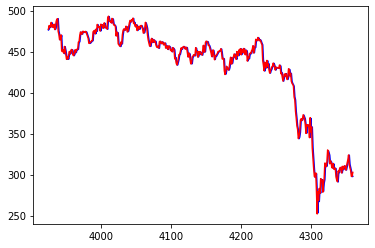

In [ ]:
plt.plot(date_range, model_predictions, color = 'blue')
plt.plot(date_range, test_set, color = 'red')
plt.show

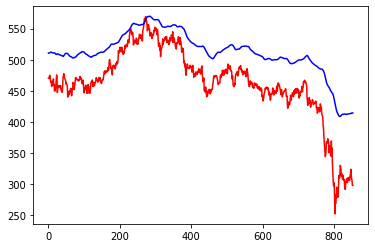

In [ ]:
plt.plot(y_test_inverse, color='red')
plt.plot(y_hat_inverse, color='blue')
plt.show();